In [61]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D, Flatten
from keras.utils import to_categorical, plot_model
from keras.datasets import mnist

Load Data

In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

Scale the Data

In [3]:
X_train = X_train/ 255
X_test = X_test/ 255

Build the model

In [4]:
model = Sequential()

# First Convolutional Layer
model.add(Conv2D(filters=32, input_shape= (28, 28, 1), 
                 kernel_size= (3,3), activation= 'relu'))
# First Pooling Layer
model.add(MaxPool2D(pool_size= (2,2)))

# Second Convolutional Layer
model.add(Conv2D(filters=16,
                 kernel_size= (3,3), activation= 'relu'))
# Second Pooling Layer
model.add(MaxPool2D(pool_size= (2,2)))

model.add(Flatten()) # Flatten Layer

model.add(Dense(256, activation= 'relu'))
model.add(Dense(128, activation= 'relu'))
model.add(Dense(10, activation= 'softmax'))

In [5]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 16)        4624      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 16)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 400)               0         
                                                                 
 dense (Dense)               (None, 256)               1

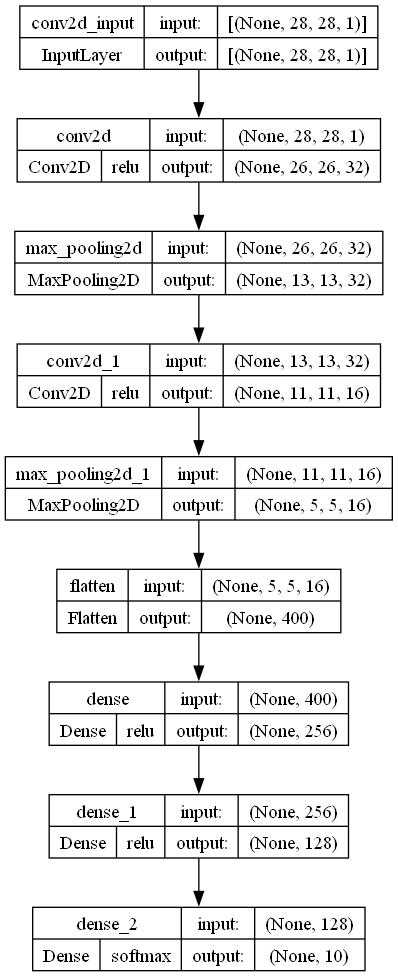

In [6]:
plot_model(model, show_layer_activations= True, show_layer_names= True, show_shapes= True)

Compile the Model

In [9]:
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])

Train the Model

In [10]:
model.fit(X_train, y_train, epochs= 10, batch_size= 10)

Epoch 1/10


6000/6000 [==============================] - 35s 6ms/step - loss: 0.1235 - accuracy: 0.9611
Epoch 2/10
6000/6000 [==============================] - 33s 6ms/step - loss: 0.0497 - accuracy: 0.9849
Epoch 3/10
6000/6000 [==============================] - 33s 6ms/step - loss: 0.0355 - accuracy: 0.9890
Epoch 4/10
6000/6000 [==============================] - 33s 6ms/step - loss: 0.0290 - accuracy: 0.9910
Epoch 5/10
6000/6000 [==============================] - 34s 6ms/step - loss: 0.0240 - accuracy: 0.9928
Epoch 6/10
6000/6000 [==============================] - 33s 6ms/step - loss: 0.0190 - accuracy: 0.9941
Epoch 7/10
6000/6000 [==============================] - 33s 6ms/step - loss: 0.0180 - accuracy: 0.9944
Epoch 8/10
6000/6000 [==============================] - 33s 6ms/step - loss: 0.0170 - accuracy: 0.9950
Epoch 9/10
6000/6000 [==============================] - 35s 6ms/step - loss: 0.0160 - accuracy: 0.9953
Epoch 10/10
6000/6000 [==============================] - 34s 6ms/step -

Evaluate the Test Data

In [11]:
model.evaluate(X_test, y_test, batch_size= 1)

10000/10000 [==============================] - 32s 3ms/step - loss: 0.0424 - accuracy: 0.9913


[0.04235069081187248, 0.9912999868392944]

Predict New Img

In [43]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [54]:
new = X_test[2801]

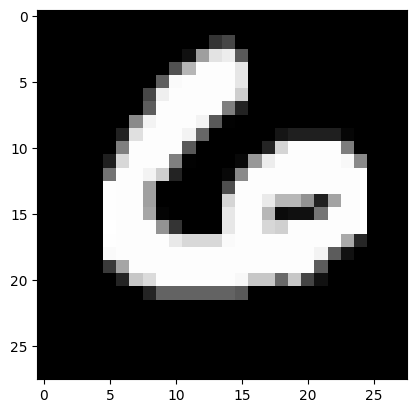

In [55]:
plt.imshow(new, cmap='gray')

In [56]:
new.size

784

In [57]:
new = cv2.resize(new, (28,28))
new

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         53,  70,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  16, 159,
        228, 237,  89,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  81, 182, 253,
        253, 253, 230,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,  95, 250, 253, 253,
        253, 253, 230,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

In [58]:
new = new/255

In [59]:
new.shape

(28, 28)

In [62]:
new = new.reshape(1, 28, 28)

In [63]:
y_pred = model.predict(new, batch_size=1)
np.argmax(y_pred)

1/1 [==============================] - 0s 149ms/step


6